In [0]:
import nltk
import sklearn
import pandas as pd

from nltk.stem.porter import *
from tokenizer import tokenizer
from nltk.corpus import stopwords
from sklearn.linear_model import *
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
tweet_data = pd.read_csv(r'/content/drive/My Drive/August01_Tweets_Final.csv')
tweet_data

,created_at,hashtags,tweetid,lang,tweet,userid
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,en,Kids need to see models of those living a bala...,1058185154726948865
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,What’s do you call Santa’s singing elves? Wrap...,977120954802475008
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,en,5# Engine Vibration Cause: Car Axle\nYou can g...,2744724846
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,en,Did you know? #Children with good #earlylangua...,1131185733899882496
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,en,Another review!! @gviewsyoutube #gviewsyoutube...,812135824913498113
5,Thu Aug 01 15:00:01 +0000 2019,SmartModel,1156942667986755586,en,"As Charles is a bit thick, don't fancy his cha...",352615777
6,Thu Aug 01 15:00:01 +0000 2019,BONADrinks,1156942667982487552,en,Enjoy this easy to make infused gin and tonic:...,297363238
7,Thu Aug 01 15:00:01 +0000 2019,"CHUU,츄",1156942667982336002,en,190727 #CHUU #츄\n© first apple https://t.co/Ii...,869892069099044864
8,Thu Aug 01 15:00:01 +0000 2019,Climatechange,1156942667999170561,en,#Climatechange is taking its first victims: po...,1017827828602232832
9,Thu Aug 01 15:00:01 +0000 2019,NastyGalsDoItBetter,1156942668011835392,en,When you casually (purposely) come across an e...,19030283


**1. Preprocess the data**

In [0]:
#@title Default title text
for index,tweet in enumerate(tweet_data["tweet"][10:15]):
    print(index+1,".",tweet)

1 . .@business: The #Dubai Financial Market General Index (@DFMalerts) finished July 9.8% higher, the third best among… https://t.co/UolO8Hp9wD
2 . "You don't have to be great to start, but you have to start to be great." - Zig Ziglar #ThoughtfulThursday https://t.co/ShsmQSdX3D
3 . Don't miss: Montecito Farmers Market Fri, Aug 2, 8:00am. https://t.co/5AzJJGzqG7 #livemusic  #tasting
4 . #Hotel Deals in #Patong #SwissPalmBeach starting at THB60.29 https://t.co/6PhTqeXFGp https://t.co/MMaz84vGmU
5 . Lazy libtard off to work.  Have a fabulous Anti-Trump day!  #LeningradLindsey https://t.co/YQKgjETTjW


In [0]:
import re

In [0]:
#Clean text from noise
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [0]:
tweet_data["clean_text"]=tweet_data.tweet.apply(lambda x: clean_text(x))

In [0]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda text: ' '.join(word for word in text.split() if word not in stopwords))

tweet_data['clean_text'].head()

0    kids need see models living balanced life thur...
1    call santa singing elves wrappers https co id ...
2    engine vibration cause car axle guess numbers ...
3    know children good earlylanguage highest achie...
4    another review gviewsyoutube gviewsyoutube htt...
Name: clean_text, dtype: object

In [0]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    return word_freq

#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
        else:
            return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
        else:
            return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
        else:
            return 0

In [0]:
word_freq=gen_freq(tweet_data.clean_text.str)

In [0]:
rare_100=word_freq[-100]

In [0]:
tweet_data.head(2)

,created_at,hashtags,tweetid,lang,tweet,userid,clean_text
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,en,Kids need to see models of those living a bala...,1058185154726948865,kids need see models living balanced life thur...
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,What’s do you call Santa’s singing elves? Wrap...,977120954802475008,call santa singing elves wrappers https co id ...


In [0]:
# Remove more empty texts.

tweet_data = tweet_data.drop(tweet_data[tweet_data['clean_text'] == ''].index)

print(len(tweet_data.index))
tweet_data['clean_text'].head()

41291


0    kids need see models living balanced life thur...
1    call santa singing elves wrappers https co id ...
2    engine vibration cause car axle guess numbers ...
3    know children good earlylanguage highest achie...
4    another review gviewsyoutube gviewsyoutube htt...
Name: clean_text, dtype: object

In [0]:
tweet_data.head(2)

,created_at,hashtags,tweetid,lang,tweet,userid,clean_text
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,en,Kids need to see models of those living a bala...,1058185154726948865,kids need see models living balanced life thur...
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,What’s do you call Santa’s singing elves? Wrap...,977120954802475008,call santa singing elves wrappers https co id ...


In [0]:
tweets = tweet_data.drop(['userid','lang'], axis=1)

In [0]:
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...


**2. Sentiment prediction**

In this section SentimentIntensityAnalyzer from the vaderSentiment library with its polarity_scores function is used. This function assigns a negative, positive, neutral and a compound score to each of the tweet.Compound score is then used to determine whether the tweet reflect a positive, negative or neutral sentiment.

In [0]:
sent_analyzer = SentimentIntensityAnalyzer()
tweets['sentiment'] = tweets['clean_text'].apply(lambda clean_text: sent_analyzer.polarity_scores(clean_text))
tweets['comp'] = tweets['sentiment'].apply(lambda sent: sent['compound'])
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [0]:
tweets.loc[tweets.comp>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.comp==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.comp<0,'sentiment_type']='NEGATIVE'
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,POSITIVE
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,POSITIVE
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


**3. Twitter emotion extraction**

In this section tweets put togther into 5 clusters. By manualy investigating these clusters, five dominant emotions are classified. 

**3.1. Preprocess the data**

The sentiment column is split in order to have one column per value.

In [0]:
# separate the value in the dictionary in the column sentiment
tweets['neg'] = tweets['sentiment'].apply(lambda sent: sent['neg'])
tweets['neu'] = tweets['sentiment'].apply(lambda sent:  sent['neu'])
tweets['pos'] = tweets['sentiment'].apply(lambda sent: sent['pos'])
tweets_kmeans = tweets.drop(['sentiment_type', 'sentiment'], axis=1)
tweets_kmeans.head()

,created_at,hashtags,tweetid,tweet,clean_text,comp,neg,neu,pos
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,0.0000,0.0,1.000,0.000
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,0.6486,0.0,0.675,0.325
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,0.0000,0.0,1.000,0.000
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,0.4404,0.0,0.828,0.172
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,0.0000,0.0,1.000,0.000


**3.2. Clustering using Kmeans**

group the tweets into 5 clusters using Kmeans applied to the compound score found in section 2.


In [0]:
# Create the kmeans with 5 clusters
num_clusters = 5
# Use random_state to ensure to always have the same labeling of clusters
random_state = 42
km = KMeans(n_clusters=num_clusters)
# Apply the kmean to the vectorized tweets
km.fit(tweets[['neg', 'neu', 'pos', 'comp']].values)
clusters = km.labels_.tolist()
# create a new columns for the cluster number
tweets['cluster'] = clusters
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,POSITIVE,0.0,0.675,0.325,1
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,POSITIVE,0.0,0.828,0.172,4
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2


**3.3. Manual investigation to detect sentiment**

In this last part clusters are manually checked to find the 5 dominant emotions and label them.

In [0]:
# Cluster 0
tweets[tweets['cluster'] == 0].head(10)

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
8,Thu Aug 01 15:00:01 +0000 2019,Climatechange,1156942667999170561,#Climatechange is taking its first victims: po...,climatechange taking first victims polar bears...,"{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",-0.3182,NEGATIVE,0.204,0.796,0.000,0
12,Thu Aug 01 15:00:02 +0000 2019,"livemusic,tasting",1156942672197750785,"Don't miss: Montecito Farmers Market Fri, Aug ...",miss montecito farmers market fri aug https co...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.1531,NEGATIVE,0.138,0.862,0.000,0
14,Thu Aug 01 15:00:02 +0000 2019,LeningradLindsey,1156942672193568770,Lazy libtard off to work. Have a fabulous Ant...,lazy libtard work fabulous anti trump day leni...,"{'neg': 0.296, 'neu': 0.494, 'pos': 0.21, 'com...",-0.1027,NEGATIVE,0.296,0.494,0.210,0
18,Thu Aug 01 15:00:03 +0000 2019,Whistler,1156942676371148801,#Whistler Alpine Forecast\nCloudy with sunny p...,whistler alpine forecast cloudy sunny periods ...,"{'neg': 0.198, 'neu': 0.676, 'pos': 0.126, 'co...",-0.1531,NEGATIVE,0.198,0.676,0.126,0
53,Thu Aug 01 15:00:28 +0000 2019,digital,1156942781253705730,There’s no denying we live in a #digital world...,denying live digital world embrace new tools s...,"{'neg': 0.144, 'neu': 0.719, 'pos': 0.138, 'co...",-0.0258,NEGATIVE,0.144,0.719,0.138,0
67,Thu Aug 01 15:00:44 +0000 2019,NewProfilePic,1156942848341626880,imma just slightly flex minkyu bc i miss him s...,imma slightly flex minkyu bc miss much newprof...,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",-0.1531,NEGATIVE,0.127,0.873,0.000,0
68,Thu Aug 01 15:00:44 +0000 2019,"News,WorldNews",1156942848345935872,61% of Canadians want government to take actio...,canadians want government take action climate ...,"{'neg': 0.16, 'neu': 0.773, 'pos': 0.067, 'com...",-0.4215,NEGATIVE,0.160,0.773,0.067,0
70,Thu Aug 01 15:00:48 +0000 2019,best,1156942865114812416,@FS1 you arent covering the #best racers @nasc...,fs arent covering best racers nascar especiall...,"{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.5216,NEGATIVE,0.194,0.806,0.000,0
72,Thu Aug 01 15:00:52 +0000 2019,"PSY,SonicMusicBot",1156942881896091648,"""Maria, damn girl, you're so freaking sexy, MA...",maria damn girl freaking sexy maria gentleman ...,"{'neg': 0.369, 'neu': 0.403, 'pos': 0.228, 'co...",-0.2732,NEGATIVE,0.369,0.403,0.228,0
80,Thu Aug 01 15:00:58 +0000 2019,thegardentheather,1156942907053658113,8pm-11pm 🔥🔥🔥🔥🔥#thegardentheather @ The Garden ...,pm pm thegardentheather garden theater detroit...,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",-0.4939,NEGATIVE,0.242,0.758,0.000,0


Cluster 0 is negative

In [0]:
# Cluster 1
tweets[tweets['cluster'] == 1].head(10)

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,POSITIVE,0.000,0.675,0.325,1
6,Thu Aug 01 15:00:01 +0000 2019,BONADrinks,1156942667982487552,Enjoy this easy to make infused gin and tonic:...,enjoy easy make infused gin tonic https co uth...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,POSITIVE,0.000,0.663,0.337,1
10,Thu Aug 01 15:00:01 +0000 2019,Dubai,1156942667978289153,.@business: The #Dubai Financial Market Genera...,business dubai financial market general index ...,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.8360,POSITIVE,0.000,0.669,0.331,1
11,Thu Aug 01 15:00:01 +0000 2019,ThoughtfulThursday,1156942667974152194,"""You don't have to be great to start, but you ...",great start start great zig ziglar thoughtfult...,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.8481,POSITIVE,0.000,0.494,0.506,1
22,Thu Aug 01 15:00:05 +0000 2019,learningexperience,1156942684776480773,Our goal is to make our customers' #learningex...,goal make customers' learningexperience better...,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.8176,POSITIVE,0.000,0.541,0.459,1
24,Thu Aug 01 15:00:07 +0000 2019,Prayer,1156942693139984384,"I pray in secret, and You reward me openly -Ma...",pray secret reward openly matt prayer,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.7184,POSITIVE,0.000,0.400,0.600,1
26,Thu Aug 01 15:00:07 +0000 2019,"trust,talent",1156942693148307456,How do #trust and #talent play a role in the f...,trust talent play role future awm industry fin...,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp...",0.8176,POSITIVE,0.000,0.564,0.436,1
36,Thu Aug 01 15:00:17 +0000 2019,"memory,hippocampus",1156942735103987713,Isn’t the brain just amazing?! #memory #hippoc...,brain amazing memory hippocampus,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp...",0.5859,POSITIVE,0.000,0.441,0.559,1
41,Thu Aug 01 15:00:20 +0000 2019,suikebot,1156942747695079424,I’m desperate to break free\nTo you they’re ju...,desperate break free friends jerks could flirt...,"{'neg': 0.265, 'neu': 0.241, 'pos': 0.494, 'co...",0.5859,POSITIVE,0.265,0.241,0.494,1
45,Thu Aug 01 15:00:22 +0000 2019,iGiveDoYou,1156942756079710208,Help Epona Horse Rescue every time you shop: h...,help epona horse rescue every time shop https ...,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.7184,POSITIVE,0.000,0.600,0.400,1


Cluster 1 is highly positive

In [0]:
# Cluster 2
tweets[tweets['cluster'] == 2].head(10)

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
7,Thu Aug 01 15:00:01 +0000 2019,"CHUU,츄",1156942667982336002,190727 #CHUU #츄\n© first apple https://t.co/Ii...,chuu first apple https co iinanihz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
13,Thu Aug 01 15:00:02 +0000 2019,"Hotel,Patong,SwissPalmBeach",1156942672206024705,#Hotel Deals in #Patong #SwissPalmBeach starti...,hotel deals patong swisspalmbeach starting thb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
20,Thu Aug 01 15:00:04 +0000 2019,ManagedIT,1156942680556998657,Everything you ever wanted to know about #Mana...,everything ever wanted know managedit afraid a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
25,Thu Aug 01 15:00:07 +0000 2019,MaineGardening,1156942693169344513,Maine Home Garden News — August 2019 #MaineGar...,maine home garden news august mainegardening h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
27,Thu Aug 01 15:00:08 +0000 2019,TeamMike,1156942697367781382,#TeamMike\nFew hours to go guys\nLet us not sl...,teammike hours go guys let us slow last hours ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
28,Thu Aug 01 15:00:12 +0000 2019,Kiel,1156942714132414465,#Kiel Aug 01 16:20 Temperature 21C few clouds ...,kiel aug temperature c clouds wind ne km h hum...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2
29,Thu Aug 01 15:00:13 +0000 2019,"강남유리방초이스010x8871x5266하니실장,선릉미러방010x8871x5266하니...",1156942718334992389,#강남유리방초이스010x8871x5266하니실장\n#선릉미러방010x8871x526...,x x x x x x x x x x reh yr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL,0.0,1.0,0.0,2


Cluster 2 is neutral

In [0]:
# Cluster 3
tweets[tweets['cluster'] == 3].head(10)

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
23,Thu Aug 01 15:00:07 +0000 2019,BookBuzzr,1156942693148311557,The woman in my chair is speaking nonstop and ...,woman chair speaking nonstop thinking killing ...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.6597,NEGATIVE,0.286,0.714,0.0,3
101,Thu Aug 01 14:32:37 +0000 2019,"thermal,camera",1156935772571951107,Reading scaffold collapse: Three injured and f...,reading scaffold collapse three injured fears ...,"{'neg': 0.482, 'neu': 0.518, 'pos': 0.0, 'comp...",-0.9022,NEGATIVE,0.482,0.518,0.0,3
139,Thu Aug 01 14:00:11 +0000 2019,BookBuzzr,1156927610452094977,Check out my book - 'Harry's War' - on #BookBu...,check book 'harry's war' bookbuzzr https co nq...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5994,NEGATIVE,0.328,0.672,0.0,3
193,Thu Aug 01 14:00:59 +0000 2019,ashes,1156927811778535425,This is fucken appalling. #ashes,fucken appalling ashes,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.3612,NEGATIVE,0.556,0.444,0.0,3
218,Thu Aug 01 14:42:37 +0000 2019,"RacistPOTUS,gop",1156938289145765889,"@naretevduorp #RacistPOTUS has embolden hate,\...",naretevduorp racistpotus embolden hate gop bas...,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'comp...",-0.9062,NEGATIVE,0.557,0.443,0.0,3
226,Thu Aug 01 14:42:51 +0000 2019,ManOfGod,1156938347849240577,@TheOfficerTatum Your comments are filled with...,theofficertatum comments filled much hate mano...,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp...",-0.5719,NEGATIVE,0.425,0.575,0.0,3
240,Thu Aug 01 14:34:09 +0000 2019,TrumpEulogies,1156936158426935296,#TrumpEulogies Here lies the carcass of a oppo...,trumpeulogies lies carcass opportunistic vulture,"{'neg': 0.775, 'neu': 0.225, 'pos': 0.0, 'comp...",-0.7096,NEGATIVE,0.775,0.225,0.0,3
243,Thu Aug 01 14:34:16 +0000 2019,"MoscowMitch,MoscowMitch",1156936187795447809,@TheRickyDavila I hear he really hates the #Mo...,therickydavila hear really hates moscowmitch h...,"{'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'comp...",-0.4927,NEGATIVE,0.313,0.687,0.0,3
296,Thu Aug 01 13:00:18 +0000 2019,nfr,1156912540321845248,"Lana.. I don’t mean to be a bitch, but this mu...",lana mean bitch multipic cover ugly nfr https ...,"{'neg': 0.47, 'neu': 0.53, 'pos': 0.0, 'compou...",-0.7964,NEGATIVE,0.470,0.530,0.0,3
328,Thu Aug 01 13:00:49 +0000 2019,NSEInTheNewsToday,1156912670337097729,#NSEInTheNewsToday\n\nFIGHTING THE MENACE OF C...,nseinthenewstoday fighting menace cancer thisd...,"{'neg': 0.502, 'neu': 0.498, 'pos': 0.0, 'comp...",-0.8779,NEGATIVE,0.502,0.498,0.0,3


Cluster 3 is highly negative

In [0]:
# Cluster 4
tweets[tweets['cluster'] == 4].head(10)

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,POSITIVE,0.0,0.828,0.172,4
5,Thu Aug 01 15:00:01 +0000 2019,SmartModel,1156942667986755586,"As Charles is a bit thick, don't fancy his cha...",charles bit thick fancy chances smartmodel,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.2023,POSITIVE,0.0,0.735,0.265,4
9,Thu Aug 01 15:00:01 +0000 2019,NastyGalsDoItBetter,1156942668011835392,When you casually (purposely) come across an e...,casually purposely come across ex nastygalsdoi...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",0.1779,POSITIVE,0.0,0.841,0.159,4
15,Thu Aug 01 15:00:01 +0000 2019,btsfanart,1156942668003520512,hand practice pt.1 &amp; 2\nlots of tae's hand...,hand practice pt amp lots tae's hands ft yoong...,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939,POSITIVE,0.0,0.849,0.151,4
16,Thu Aug 01 15:00:02 +0000 2019,"Microsoft,USPartners",1156942672197758976,Ready for take off? #Microsoft's Sky's the Lim...,ready take microsoft's sky's limit partner tak...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.3612,POSITIVE,0.0,0.872,0.128,4
17,Thu Aug 01 15:00:03 +0000 2019,SC,1156942676392108034,$SC is now worth $0.00274 (-0.32%) and 0.00000...,sc worth btc sc https co bx kmac b,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.2263,POSITIVE,0.0,0.808,0.192,4
19,Thu Aug 01 15:00:04 +0000 2019,"earthquake,CA",1156942680586244096,1.5 magnitude #earthquake. 14 mi from Searles ...,magnitude earthquake mi searles valley ca unit...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,POSITIVE,0.0,0.797,0.203,4
21,Thu Aug 01 15:00:05 +0000 2019,AI,1156942684759744512,#AI is more than just a buzz term. It will be ...,ai buzz term reality first need get network re...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.3612,POSITIVE,0.0,0.839,0.161,4
30,Thu Aug 01 15:00:13 +0000 2019,ImOldEnoughToRememberWhen,1156942718322585601,#ImOldEnoughToRememberWhen you couldn't easily...,imoldenoughtorememberwhen easily e file taxes ...,"{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp...",0.3400,POSITIVE,0.0,0.821,0.179,4
34,Thu Aug 01 15:00:16 +0000 2019,Asksportstak,1156942730905321473,@vikrantgupta73 #Asksportstak sir ehat is your...,vikrantgupta asksportstak sir ehat playing fir...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.2023,POSITIVE,0.0,0.769,0.231,4


Cluster 4 is positive


**Summary:**

cluster 0 that is negative. We will call it 'sadness'.

cluster 1 that is gighly positive. We will call it 'love'

cluster 2 that is neutral. We will call it 'neutral'.

cluster 3 that is highly negative. We will call it 'anger'.

cluster 4 that is positive. We will call it 'enjoyment'.

In [0]:
# We add the labels to the dataset
emotions = {'0': 'sadness', '1': 'love', '2': 'neutral', '3': 'anger', '4': 'enjoyment'}
tweets['emotion'] = tweets['cluster'].apply(lambda cluster: emotions[str(cluster)])
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster,emotion
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,POSITIVE,0.0,0.675,0.325,1,love
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,POSITIVE,0.0,0.828,0.172,4,anger
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness


**4. Train Emotion Recognition Model**

Train a emotion recognition model using the output data from the sentiment analysis.



In [0]:
sentiment140_df = tweets.drop(['created_at','tweet','tweetid','sentiment', 'hashtags'], axis=1)

In [0]:
sentiment140_df.head()

,clean_text,comp,sentiment_type,neg,neu,pos,cluster,emotion
0,kids need see models living balanced life thur...,0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness
1,call santa singing elves wrappers https co id ...,0.6486,POSITIVE,0.0,0.675,0.325,1,love
2,engine vibration cause car axle guess numbers ...,0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness
3,know children good earlylanguage highest achie...,0.4404,POSITIVE,0.0,0.828,0.172,4,anger
4,another review gviewsyoutube gviewsyoutube htt...,0.0000,NEUTRAL,0.0,1.000,0.000,2,sadness


In [0]:
sentiment = sentiment140_df.drop(['comp','sentiment_type','neg','neu',
                            'pos','cluster'], axis=1)

In [0]:
sentiment.rename(columns = {'clean_text':'tweet'}, inplace = True) 

In [0]:
sentiment.head()

,tweet,emotion
0,kids need see models living balanced life thur...,sadness
1,call santa singing elves wrappers https co id ...,love
2,engine vibration cause car axle guess numbers ...,sadness
3,know children good earlylanguage highest achie...,anger
4,another review gviewsyoutube gviewsyoutube htt...,sadness


In [0]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from pathlib import Path

**4.1. Tokenize**

Transform the text corpus to a vector representation

num_words: Number of words to use


In [0]:
num_words = 10000

tokenizer = Tokenizer(num_words=num_words, lower=True)
tokenizer.fit_on_texts(sentiment.tweet)

file_to_save = Path('C:/Users/shrey/Downloads/tokenizer.pickle').resolve()
with file_to_save.open('wb') as file:
    pickle.dump(tokenizer, file)

**4.2. Split data**

Split the dataset in train and validation data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data = sentiment.copy()

train = pd.DataFrame(columns=['emotion', 'tweet'])
validation = pd.DataFrame(columns=['emotion', 'tweet'])
for emotion in data.emotion.unique():
    emotion_data = data[data.emotion == emotion]
    train_data, validation_data = train_test_split(emotion_data, test_size=0.3)
    train = pd.concat([train, train_data])
    validation = pd.concat([validation, validation_data])

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


**4.3. Model**

Define the LSTM + CNN model

In [0]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, Conv1D, Dense, concatenate
from tensorflow.keras.models import Model

In [0]:
input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
num_classes = len(data.emotion.unique())
embedding_dim = 500
input_length = 100
lstm_units = 128
lstm_dropout = 0.1
recurrent_dropout = 0.1
spatial_dropout=0.2
filters=64
kernel_size=3

In [0]:
input_layer = Input(shape=(input_length,))
output_layer = Embedding(
  input_dim=input_dim,
  output_dim=embedding_dim,
  input_shape=(input_length,)
)(input_layer)

output_layer = SpatialDropout1D(spatial_dropout)(output_layer)

output_layer = Bidirectional(
LSTM(lstm_units, return_sequences=True,
     dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)
)(output_layer)
output_layer = Conv1D(filters, kernel_size=kernel_size, padding='valid',
                    kernel_initializer='glorot_uniform')(output_layer)

avg_pool = GlobalAveragePooling1D()(output_layer)
max_pool = GlobalMaxPooling1D()(output_layer)
output_layer = concatenate([avg_pool, max_pool])

output_layer = Dense(num_classes, activation='softmax')(output_layer)

model = Model(input_layer, output_layer)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 500)     5000000     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 100, 500)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 100, 256)     644096      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

**4.4. Prepare the data**

Prepare the model input data

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [0]:
train_sequences = [tweet.split() for tweet in train.tweet]
validation_sequences = [tweet.split() for tweet in validation.tweet]
list_tokenized_train = tokenizer.texts_to_sequences(train_sequences)
list_tokenized_validation = tokenizer.texts_to_sequences(validation_sequences)
x_train = pad_sequences(list_tokenized_train, maxlen=input_length)
x_validation = pad_sequences(list_tokenized_validation, maxlen=input_length)

encoder = LabelBinarizer()
encoder.fit(data.emotion.unique())

encoder_path = Path('C:/Users/shrey/Downloads/', 'encoder.pickle')
with encoder_path.open('wb') as file:
    pickle.dump(encoder, file)

y_train = encoder.transform(train.emotion)
y_validation = encoder.transform(validation.emotion)

**4.5. Train model**

Do the training process with the given data

In [0]:
batch_size = 128
epochs = 1

In [0]:
history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_validation, y_validation)
        )

Train on 28902 samples, validate on 12389 samples
28902/28902 [==============================] - 594s 21ms/sample - loss: 0.8824 - accuracy: 0.6715 - val_loss: 0.4969 - val_accuracy: 0.8304


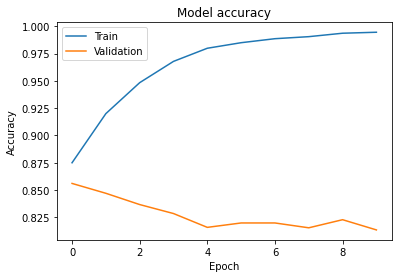

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

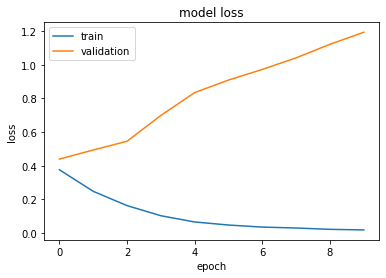

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**5. Emotion Recognition Model Validation**

The main objective here is to validate the trained model for emotion recognition

In [0]:
model_file = Path('C:/Users/shrey/Downloads/model_weights.h5').resolve()
model.save_weights(model_file.as_posix())

In [0]:
tweets.head()

,created_at,hashtags,tweetid,tweet,clean_text,sentiment,comp,sentiment_type,neg,neu,pos,cluster,emotion
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,Kids need to see models of those living a bala...,kids need see models living balanced life thur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,3,neutral
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,What’s do you call Santa’s singing elves? Wrap...,call santa singing elves wrappers https co id ...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,POSITIVE,0.0,0.675,0.325,1,love
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,5# Engine Vibration Cause: Car Axle\nYou can g...,engine vibration cause car axle guess numbers ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,3,neutral
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,Did you know? #Children with good #earlylangua...,know children good earlylanguage highest achie...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,POSITIVE,0.0,0.828,0.172,0,enjoyment
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,Another review!! @gviewsyoutube #gviewsyoutube...,another review gviewsyoutube gviewsyoutube htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0.0,1.000,0.000,3,neutral


In [0]:
test_data = tweets.drop(['tweet','hashtags','sentiment_type','cluster', 'sentiment', 'comp', 'sentiment_type', 'neg', 'neu', 'pos' ], axis=1)

In [0]:
test_data.head()

,created_at,tweetid,clean_text,emotion
0,Thu Aug 01 15:00:00 +0000 2019,1156942663792451587,kids need see models living balanced life thur...,sadness
1,Thu Aug 01 15:00:00 +0000 2019,1156942663792451586,call santa singing elves wrappers https co id ...,love
2,Thu Aug 01 15:00:00 +0000 2019,1156942663809032194,engine vibration cause car axle guess numbers ...,sadness
3,Thu Aug 01 15:00:00 +0000 2019,1156942663788032005,know children good earlylanguage highest achie...,anger
4,Thu Aug 01 15:00:01 +0000 2019,1156942667973980161,another review gviewsyoutube gviewsyoutube htt...,sadness


In [0]:
test_data.rename(columns = {'clean_text':'tweet'}, inplace = True) 

**5.1. Preprocess data**

Preprocess the data that will be used

In [0]:
from nlp_utils import preprocess
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [0]:
sequences = [tweet.split() for tweet in test_data.tweet]
list_tokenized = tokenizer.texts_to_sequences(sequences)
x_test = pad_sequences(list_tokenized, maxlen=100)
y_test = encoder.transform(test_data.emotion)

In [0]:
x_test.shape

(41291, 100)

**5.2. Results**

Predict the labels and generate a confusion matrix

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

Normalized confusion matrix
[[8.60092420e-01 2.35964999e-02 6.08593059e-02 4.03106872e-03
  5.14207059e-02]
 [1.47386964e-01 4.27480916e-01 2.40751615e-02 2.07574868e-01
  1.93482090e-01]
 [1.26541480e-01 5.60538117e-03 8.56642377e-01 2.10201794e-03
  9.10874439e-03]
 [2.08897485e-02 1.14119923e-01 1.62475822e-02 7.47775629e-01
  1.00967118e-01]
 [1.14488968e-02 5.05752237e-03 5.55771689e-05 2.38981826e-03
  9.81048185e-01]]


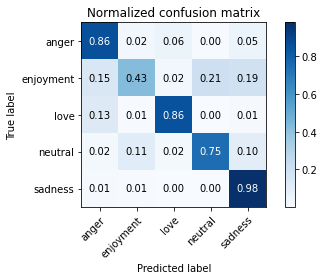

In [0]:
fig, ax = plot_confusion_matrix(y_test, y_pred, encoder.classes_, normalize=True)
fig.savefig('confusion_matrix.png')

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8694872974740259
